In [1]:
import graspy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline

/Users/j1c/miniconda3/envs/graspy/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


/Users/j1c/miniconda3/envs/graspy/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/j1c/miniconda3/envs/graspy/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):
/Users/j1c/miniconda3/envs/graspy/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/j1c/miniconda3/envs/graspy/lib/python3.7/site-packages/networkx-2.2-py3.7.egg/networkx/drawing/nx_pylab.py:611: 

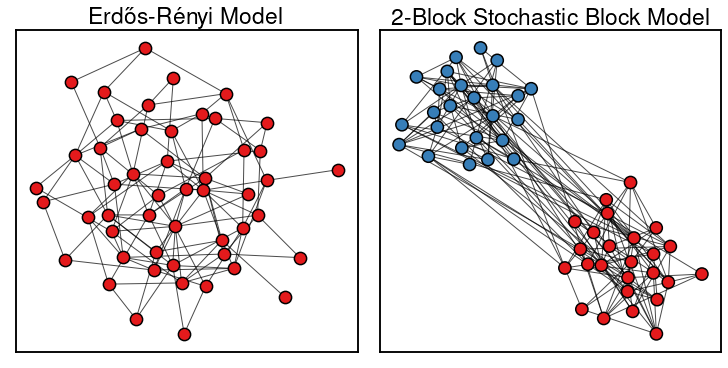

In [4]:
node_size=150

sns.set_context("talk")
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Draw an ER graph
np.random.seed(2)
A = graspy.simulations.er_np(50, .1)
G = nx.from_numpy_array(A)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='#e41a1c', edgecolors='k', ax=ax[0])
nx.draw_networkx_edges(G, pos, alpha=0.7, ax=ax[0])

# Draw an SBM
np.random.seed(1)
A2 = graspy.simulations.sbm([25, 25], [[.5, .025], [.025, .5]])
G2 = nx.from_numpy_array(A2)
pos = nx.spring_layout(G2)

A3 = graspy.simulations.sbm([25, 25], [[.2, .05], [.05, .2]])
G3 = nx.from_numpy_array(A3)
node_colors = ["#e41a1c"]*25 + ["#377eb8"]*25
nx.draw_networkx_nodes(G3, pos, node_size=node_size, node_color=node_colors, edgecolors='k', ax=ax[1])
nx.draw_networkx_edges(G3, pos, alpha=0.7, ax=ax[1])

# Set titles
ax[0].set_title(r"Erd\H os-R\'enyi Model", fontsize=23)
ax[1].set_title(r"2-Block Stochastic Block Model", fontsize=23)

# remove the x and y ticks
for a in ax:
    #a.axis('off')
    a.set_xticks([])
    a.set_yticks([])

In [5]:
fig.savefig("./figures/er_sbm_example.png", dpi=300, bbox_inches='tight')
fig.savefig("./figures/er_sbm_example.pdf", dpi=300, bbox_inches='tight')